In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    dataset_path = Path("datasets/housing")
    if not dataset_path.is_dir():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
        tarball_path.unlink()
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [2]:
housing[:25]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


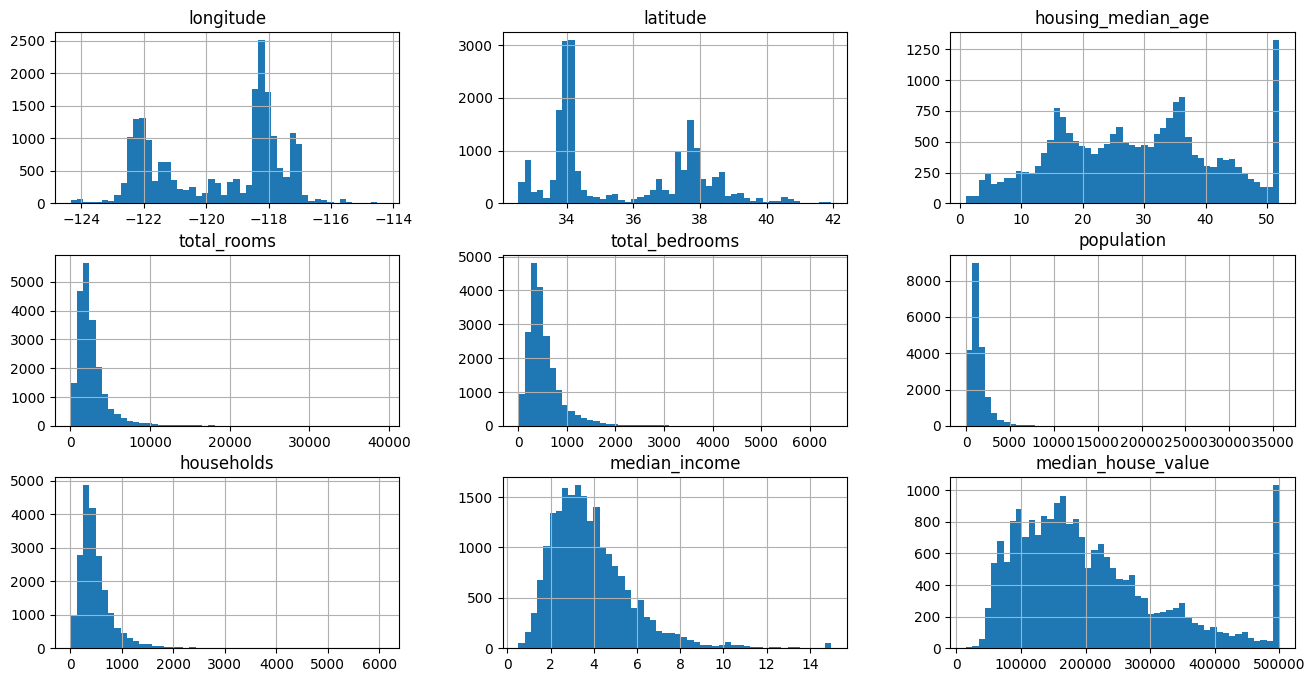

In [6]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(16,8))
plt.show()

In [7]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

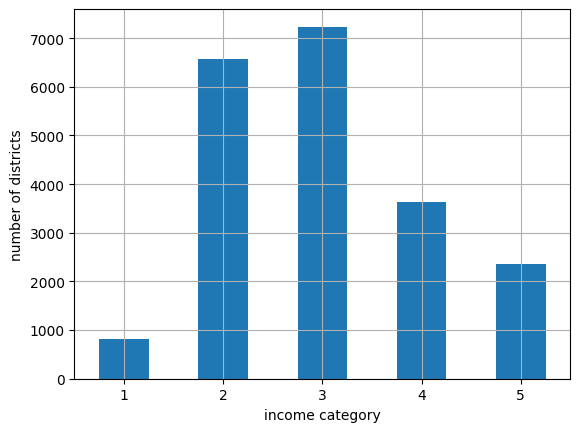

In [8]:
housing["income_cat"].value_counts().sort_index().plot.bar(grid=True, rot=0)
plt.xlabel("income category")
plt.ylabel("number of districts")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, random_state=42, test_size=0.2, stratify=housing["income_cat"])

In [10]:
len(strat_test_set), len(strat_train_set)

(4128, 16512)

<Axes: xlabel='income_cat'>

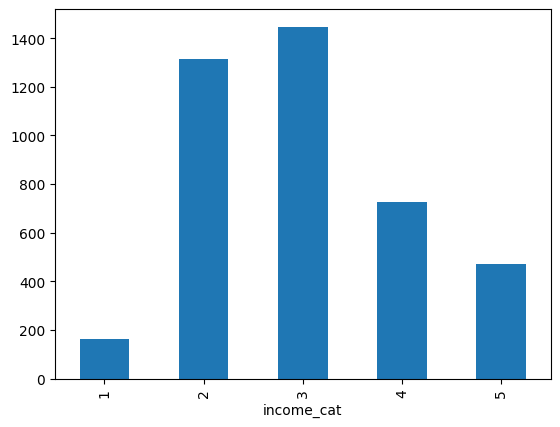

In [11]:
strat_test_set["income_cat"].value_counts().sort_index().plot.bar()

<Axes: xlabel='income_cat'>

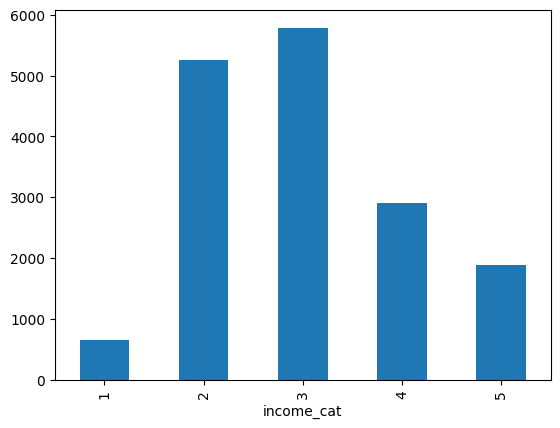

In [12]:
strat_train_set["income_cat"].value_counts().sort_index().plot.bar()

In [13]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

In [14]:
housing = strat_train_set.copy()

In [15]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


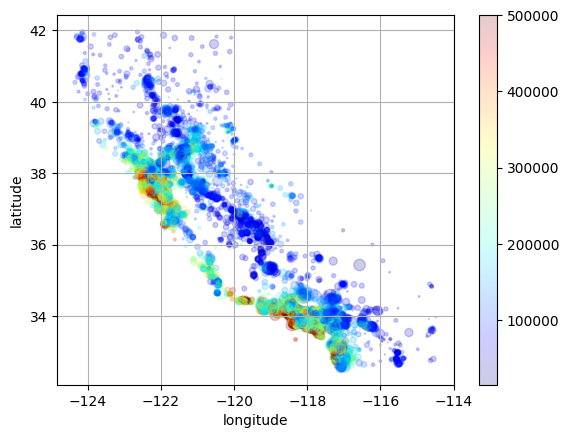

In [16]:
housing.plot.scatter(x="longitude", y="latitude", grid=True, alpha=0.2, s=housing["population"]/100, c=housing["median_house_value"], cmap="jet")
plt.show()

In [17]:
housing.drop("ocean_proximity", axis=1).corr()["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

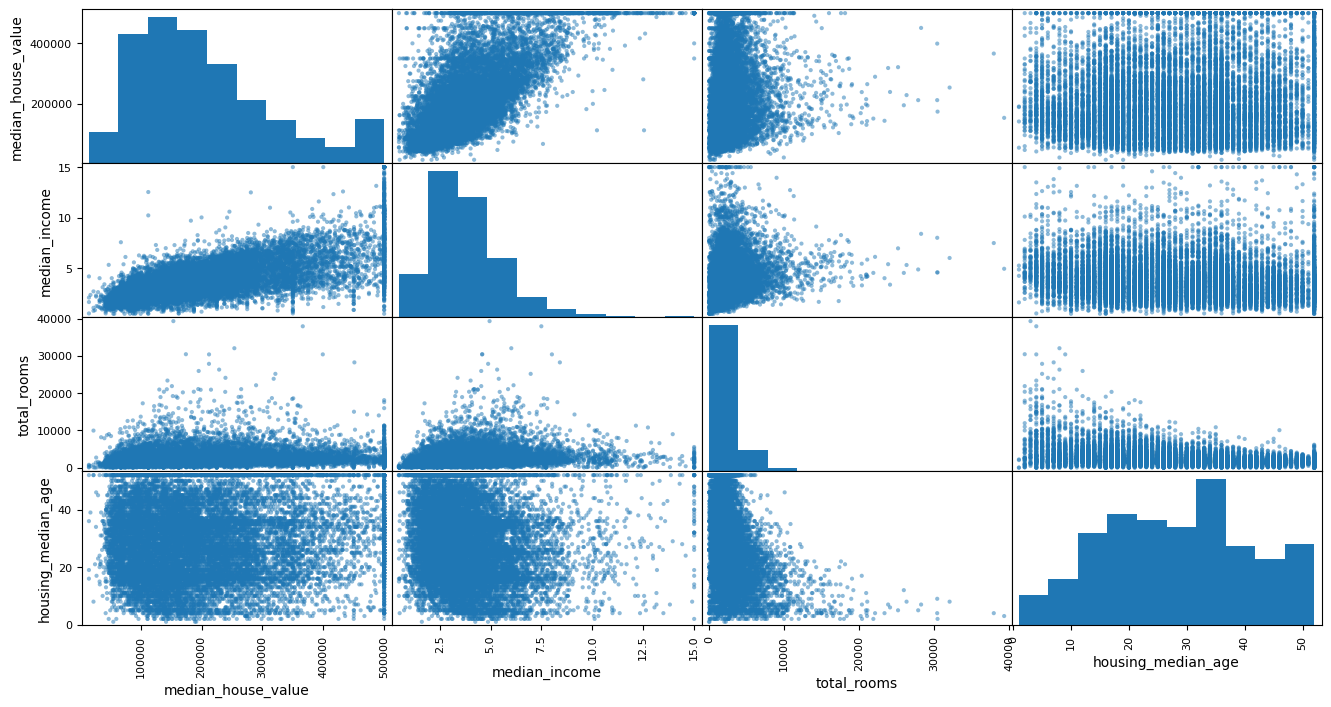

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(16,8))

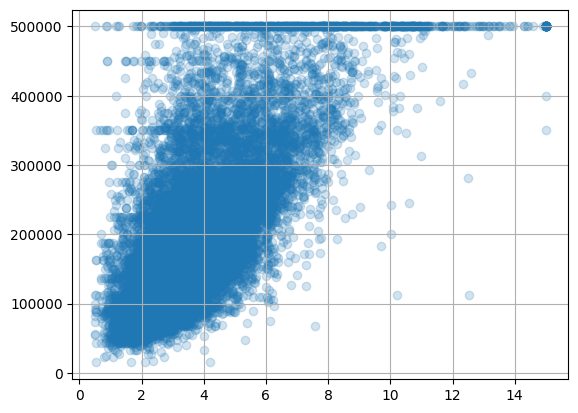

In [19]:
plt.scatter(x=housing["median_income"], y=housing["median_house_value"], alpha=0.2)
plt.grid()

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,4.511933,0.230891,2.058473


In [21]:
housing.drop("ocean_proximity", axis=1).corr()["median_house_value"]

longitude             -0.050859
latitude              -0.139584
housing_median_age     0.102175
total_rooms            0.137455
total_bedrooms         0.054635
population            -0.020153
households             0.071426
median_income          0.688380
median_house_value     1.000000
rooms_per_household    0.143663
bedrooms_ratio        -0.256397
people_per_house      -0.038224
Name: median_house_value, dtype: float64

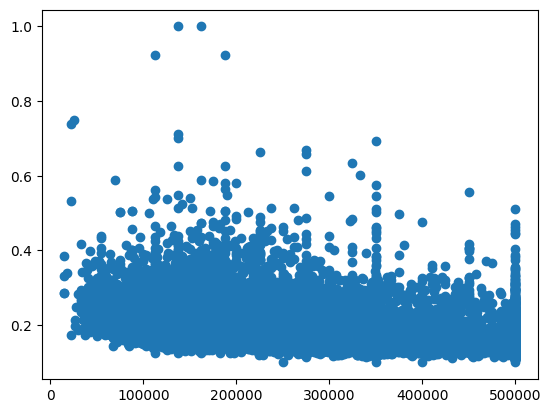

In [22]:
plt.scatter(x=housing["median_house_value"], y=housing["bedrooms_ratio"])

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
len(housing), len(housing_labels)

(16512, 16512)

In [25]:
housing_num = housing.select_dtypes(include=[np.number])

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

X = imputer.transform(housing_num)

df = pd.DataFrame(data=X, columns=housing_num.columns, index=housing_num.index)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [27]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

oridinal_encoder = OrdinalEncoder()
housing_cat_encoded = oridinal_encoder.fit_transform(housing)
pd.DataFrame(housing_cat_encoded)


one_hot_encoder = OneHotEncoder()
housing_cat_encoded = one_hot_encoder.fit_transform(housing[["ocean_proximity"]])
print(one_hot_encoder.categories_)
pd.DataFrame(housing_cat_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out())

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,0.0,0.0,0.0,1.0
16510,1.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns)

standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_num)
pd.DataFrame(housing_num_standard_scaled, columns=housing_num.columns)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


In [30]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[housing["housing_median_age"].median()]], gamma=0.1)
age_simil_35

array([[1.06126027e-23],
       [5.55951324e-06],
       [2.01896518e-01],
       ...,
       [7.62186519e-12],
       [1.66155727e-03],
       [1.69189792e-10]])

In [31]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)

model.predict(housing[["median_income"]].iloc[:5]), housing_labels[:5]


(array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
        192016.61557639]),
 13096    458300.0
 14973    483800.0
 3785     101700.0
 14689     96100.0
 20507    361800.0
 Name: median_house_value, dtype: float64)

array([[<Axes: title={'center': 'population'}>]], dtype=object)

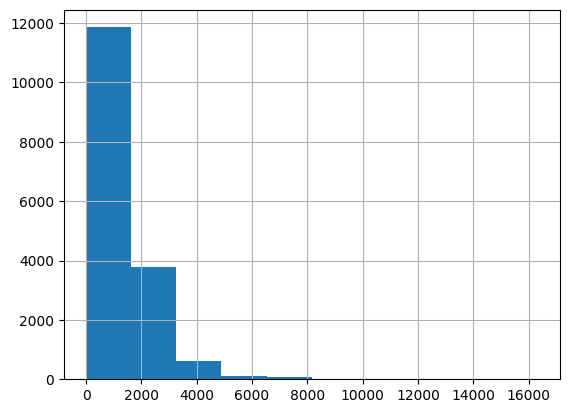

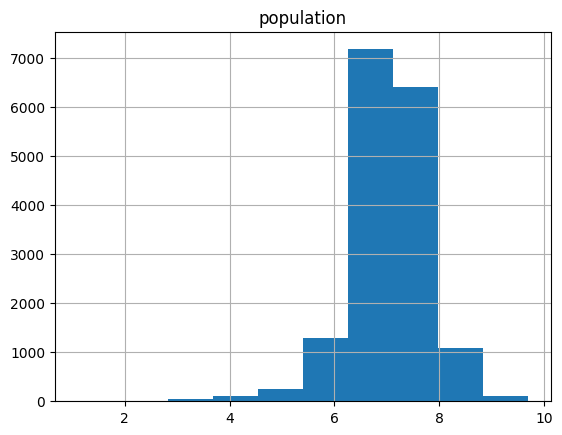

In [32]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pop = log_transformer.transform(housing[["population"]])

housing["population"].hist()

log_pop.hist()


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [34]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        self.cluster_centers = None
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X,sample_weight=sample_weight)
        self.cluster_centers = self.kmeans.cluster_centers_
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]   

    def get_cluster_centers_out(self):
        return self.cluster_centers

In [35]:
cluster_similarity = ClusterSimilarity(n_clusters=5)
similarities = pd.DataFrame(cluster_similarity.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)).max(axis=1)
cluster_centers = pd.DataFrame(cluster_similarity.get_cluster_centers_out(), columns=["latitude", "longitude"])



cluster_similarity.get_feature_names_out(), similarities[:3].round(2), cluster_centers, similarities

(['Cluster 0 similarity',
  'Cluster 1 similarity',
  'Cluster 2 similarity',
  'Cluster 3 similarity',
  'Cluster 4 similarity'],
 0    0.88
 1    0.94
 2    0.58
 dtype: float64,
     latitude   longitude
 0  33.994192 -118.172671
 1  37.635190 -122.103345
 2  35.555437 -119.794003
 3  33.012722 -117.052209
 4  39.038508 -121.536268,
 0        0.880352
 1        0.937775
 2        0.582420
 3        0.578730
 4        0.950492
            ...   
 16507    0.932687
 16508    0.440954
 16509    0.836311
 16510    0.945530
 16511    0.909689
 Length: 16512, dtype: float64)

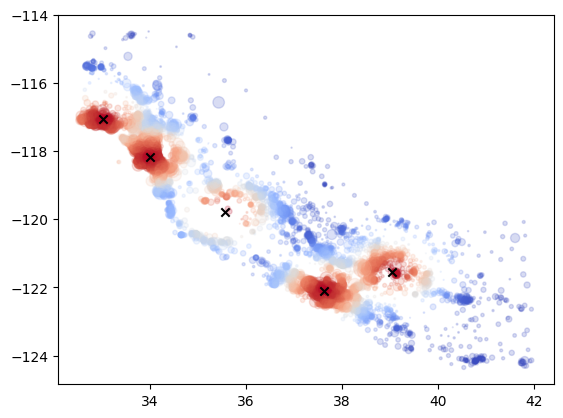

In [36]:
plt.scatter(x=housing["latitude"], y=housing["longitude"], cmap="coolwarm", c=similarities, s=housing["population"]/100, alpha=0.2)
plt.scatter(x=cluster_centers["latitude"], y=cluster_centers["longitude"], marker="x", color="black")

In [37]:
import sklearn
sklearn.set_config(display="diagram")

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standarize", StandardScaler()),
])

num_pipeline

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [38]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [39]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
 "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

from sklearn.compose import make_column_transformer, make_column_selector

pipeline = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

pipeline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b087ee30c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b08416f3dd0>)])

In [40]:
housing_prepared = pipeline.fit_transform(housing)
pd.DataFrame(housing_prepared, columns=pipeline.get_feature_names_out())

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [41]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7b083eb4be20>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b0835e7c610>)])

In [42]:
housing_prepared = preprocessing.fit_transform(housing)
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out())
df_housing_prepared

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
0,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,8.489216e-04,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119
1,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,5.614049e-27,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630
2,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,5.641131e-03,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428
3,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.913326e-35,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891
4,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,5.421817e-30,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.878046e-28,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087
16508,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,7.663746e-14,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146
16509,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,1.715187e-42,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721
16510,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,2.464809e-27,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257


In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(
    preprocessing,
    LinearRegression()
)

lin_reg.fit(housing, housing_labels)

housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2), housing_labels[:5].values

(array([246000., 372700., 135700.,  91400., 330900.]),
 array([458300., 483800., 101700.,  96100., 361800.]))

In [44]:
from sklearn.metrics import root_mean_squared_error

lin_rsme = root_mean_squared_error(housing_labels, housing_predictions)

lin_rsme

68972.88910758574

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)

tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)

tree_rsme = root_mean_squared_error(housing_labels, housing_predictions)
tree_rsme

0.0

In [46]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     67013.360949
std       1460.198570
min      64289.376198
25%      66776.146282
50%      67086.216281
75%      68140.275029
max      68659.294290
dtype: float64

In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_reg.fit(housing, housing_labels)

housing_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [48]:
pd.Series(housing_rmses).describe()

count       10.000000
mean     47124.604437
std       1069.311372
min      45292.329302
25%      46712.106520
50%      47172.209883
75%      47561.377695
max      49354.705514
dtype: float64

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "columntransformer__geo__n_clusters": [5,8,10],
        "randomforestregressor__max_features":[4,6,8]
    },
    {
        "columntransformer__geo__n_clusters": [10, 15],
        "randomforestregressor__max_features":[6, 8, 10]
    }
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_ou...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b0835e7c610>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'columntransformer__geo__n_clusters': [5, 8, 10],
                          'randomforestregressor__max_features': [4, 6, 8]},
                         {'columntransformer__geo__n_clusters': [10, 15],
                          'randomforestregressor__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [50]:
forest_reg.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                SimpleImputer(strategy='median')),
                                               ('standardscaler',
                                                StandardScaler())]),
                     transformers=[('bedrooms',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('functiontransformer',
                                                     FunctionTransformer(feature_names_out=<function ratio_name at 0x7b083eb4be20>,
                                                                         func=<function column_ratio...
                                    ['total_bedrooms', 'total_rooms', 'population',
                                     'households', 'median_income

In [51]:
grid_search.best_params_

{'columntransformer__geo__n_clusters': 15,
 'randomforestregressor__max_features': 6}

In [53]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__geo__n_clusters,param_randomforestregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.092034,0.020580,0.071905,0.000119,15,6,"{'columntransformer__geo__n_clusters': 15, 'ra...",-43520.694854,-43958.237963,-44759.841846,-44079.591555,513.105796,1
13,3.995892,0.025626,0.071467,0.000318,15,8,"{'columntransformer__geo__n_clusters': 15, 'ra...",-44027.285408,-44179.627865,-45007.255144,-44404.722806,430.570141,2
14,4.869315,0.010543,0.071925,0.000169,15,10,"{'columntransformer__geo__n_clusters': 15, 'ra...",-44402.775080,-44618.770051,-45423.947846,-44815.164326,439.413615,3
7,3.007318,0.021625,0.071392,0.000146,10,6,"{'columntransformer__geo__n_clusters': 10, 'ra...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4
9,3.018462,0.031922,0.071216,0.000268,10,6,"{'columntransformer__geo__n_clusters': 10, 'ra...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4
6,2.157761,0.019294,0.071535,0.000078,10,4,"{'columntransformer__geo__n_clusters': 10, 'ra...",-44350.643617,-45053.772272,-45975.049437,-45126.488442,665.151260,6
8,3.876960,0.024912,0.071434,0.000154,10,8,"{'columntransformer__geo__n_clusters': 10, 'ra...",-44842.258143,-45070.071308,-46206.539142,-45372.956197,596.724450,7
10,3.897611,0.040672,0.071575,0.000477,10,8,"{'columntransformer__geo__n_clusters': 10, 'ra...",-44842.258143,-45070.071308,-46206.539142,-45372.956197,596.724450,7
4,3.009416,0.029566,0.071371,0.000298,8,6,"{'columntransformer__geo__n_clusters': 8, 'ran...",-45589.002229,-45304.657785,-46377.677600,-45757.112538,453.900641,9
3,2.156211,0.008390,0.073053,0.002641,8,4,"{'columntransformer__geo__n_clusters': 8, 'ran...",-45529.869075,-45510.968155,-46359.178097,-45800.005109,395.470297,10


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "columntransformer__geo__n_clusters": randint(low=3, high=50),
    "randomforestregressor__max_features": randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    forest_reg, param_distributions=param_distribs, n_iter=10, cv=3, 
    scoring="neg_root_mean_squared_error", random_state=42
)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_na...
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'columntransformer__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b0834cadcd0>,
                                        'randomforestregressor__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b0835820b10>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [56]:
rnd_search.best_params_

{'columntransformer__geo__n_clusters': 45,
 'randomforestregressor__max_features': 9}

In [60]:
pd.DataFrame(rnd_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__geo__n_clusters,param_randomforestregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,4.564173,0.033163,0.087827,0.000441,45,9,"{'columntransformer__geo__n_clusters': 45, 'ra...",-41204.253373,-42108.203702,-42997.977688,-42103.478254,732.292508,1
8,3.590332,0.019449,0.086351,0.000079,32,7,"{'columntransformer__geo__n_clusters': 32, 'ra...",-41991.365603,-42556.901035,-43431.427462,-42659.898033,592.396728,2
5,2.273503,0.068833,0.086449,0.000246,42,4,"{'columntransformer__geo__n_clusters': 42, 'ra...",-42030.576161,-42968.400482,-43616.526368,-42871.834337,651.052112,3
0,7.724362,0.005735,0.087867,0.000122,41,16,"{'columntransformer__geo__n_clusters': 41, 'ra...",-42580.486638,-42868.652778,-43604.118879,-43017.752765,430.990213,4
2,4.000929,0.026264,0.073349,0.000721,23,8,"{'columntransformer__geo__n_clusters': 23, 'ra...",-42420.893552,-42841.063629,-44231.742930,-43164.566704,773.858104,5
7,6.291430,0.067341,0.086159,0.000264,26,13,"{'columntransformer__geo__n_clusters': 26, 'ra...",-43062.803706,-43375.658228,-44082.273421,-43506.911785,426.419392,6
6,1.815055,0.009555,0.084824,0.000039,24,3,"{'columntransformer__geo__n_clusters': 24, 'ra...",-42827.549496,-43580.399117,-44862.250967,-43756.733193,839.969364,7
3,5.770317,0.008353,0.072518,0.000036,21,12,"{'columntransformer__geo__n_clusters': 21, 'ra...",-43418.711853,-43877.545089,-44747.735280,-44014.664074,551.166659,8
4,2.639540,0.040064,0.071913,0.000404,13,5,"{'columntransformer__geo__n_clusters': 13, 'ra...",-43676.923671,-44259.689425,-45226.537572,-44387.716889,639.071766,9
9,1.313289,0.005945,0.070715,0.000486,4,2,"{'columntransformer__geo__n_clusters': 4, 'ran...",-50542.400430,-50529.356868,-52341.843532,-51137.866943,851.356663,10
